In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("Bias_correction.csv",parse_dates =["Date"])

In [47]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [48]:
df["Date"].value_counts()

2017-08-21    25
2016-07-20    25
2014-08-22    25
2015-07-26    25
2015-05-08    25
              ..
2017-08-25    25
2017-06-07    25
2014-12-07    25
2013-07-29    25
2015-01-08    25
Name: Date, Length: 310, dtype: int64

In [49]:
df["station"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [50]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [51]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

In [53]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

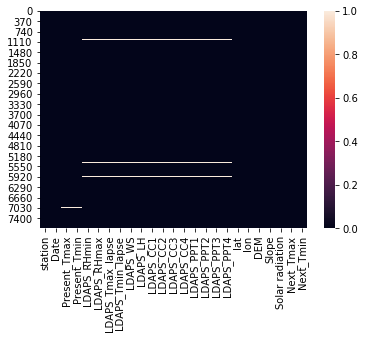

In [54]:
sns.heatmap(df.isnull())

In [55]:
dfcor = df.corr()

dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


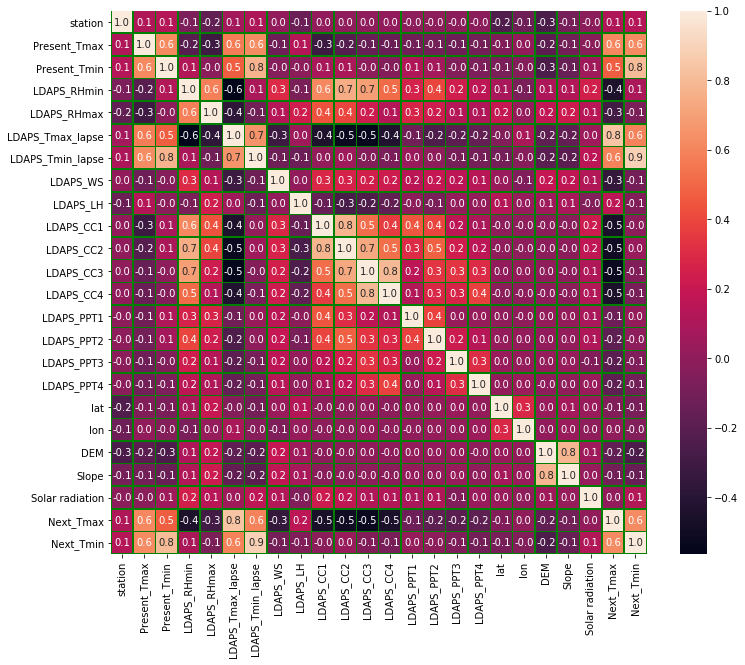

In [56]:
# Checking correlation using heatmap
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(dfcor,annot=True,linewidth=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

Text(0.5, 1.0, 'Present_Tmax')

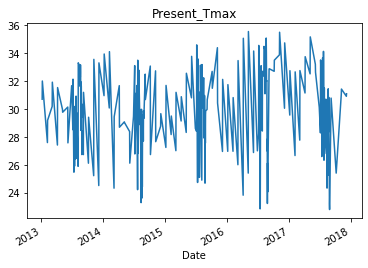

In [57]:
# below graph shows variation in Present_Tmax  with date
byDate=df.groupby('Date').mean()
plt.figure(figsize=(6,4))
byDate['Present_Tmax'].plot()
plt.title('Present_Tmax')

Text(0.5, 1.0, 'Present_Tmin')

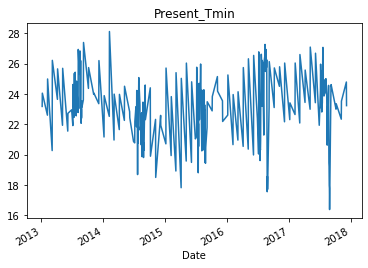

In [58]:
# below graph shows variation in Present_Tmin  with date
byDate=df.groupby('Date').mean()
plt.figure(figsize=(6,4))
byDate['Present_Tmin'].plot()
plt.title('Present_Tmin')

In [59]:
len(df["Date"].unique())

311

In [60]:
# Extracting months,day,year from Effective To Date column
df_temp_date = pd.DataFrame()
df_temp_date["months"]=df["Date"].dt.month_name()
df_temp_date["year"]=df["Date"].dt.year
df_temp_date["day"]=df["Date"].dt.day_name()
df_temp_date["Next_Tmax"]=df["Next_Tmax"]
df_temp_date["Next_Tmin"]=df["Next_Tmin"]

In [61]:
df_temp_date

,months,year,day,Next_Tmax,Next_Tmin
0,June,2013.0,Sunday,29.1,21.2
1,June,2013.0,Sunday,30.5,22.5
2,June,2013.0,Sunday,31.1,23.9
3,June,2013.0,Sunday,31.7,24.3
4,June,2013.0,Sunday,31.2,22.5
...,...,...,...,...,...
7747,August,2017.0,Wednesday,28.3,18.1
7748,August,2017.0,Wednesday,28.6,18.8
7749,August,2017.0,Wednesday,27.8,17.4
7750,NaN,NaN,NaN,17.4,11.3


In [62]:
df_year = df_temp_date.groupby("year",axis=0).mean()

In [63]:
df_year

,Next_Tmax,Next_Tmin
year,,
2013.0,30.152553,23.705882
2014.0,29.611491,21.962750
2015.0,30.366213,22.356291
2016.0,31.253070,23.496962
2017.0,29.993368,23.142913


Text(0, 0.5, 'Next_Tmax')

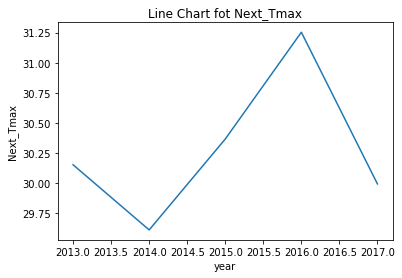

In [64]:
# Line Chart
df_year.iloc[:,0].plot(kind="line")
plt.title("Line Chart fot Next_Tmax")
plt.ylabel("Next_Tmax")

Text(0, 0.5, 'Next_Tmin')

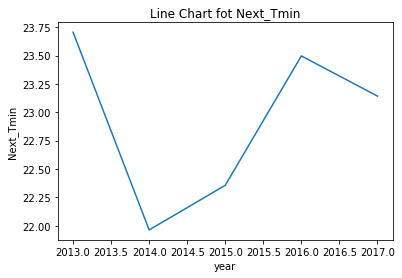

In [65]:
# Line Chart
df_year.iloc[:,1].plot(kind="line")
plt.title("Line Chart fot Next_Tmin")
plt.ylabel("Next_Tmin")

Text(0, 0.5, 'Next_Tmax')

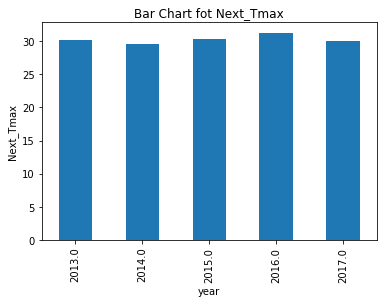

In [66]:
# Bar Chart
df_year.iloc[:,0].plot(kind="bar")
plt.title("Bar Chart fot Next_Tmax")
plt.ylabel("Next_Tmax")

Text(0, 0.5, 'Next_Tmin')

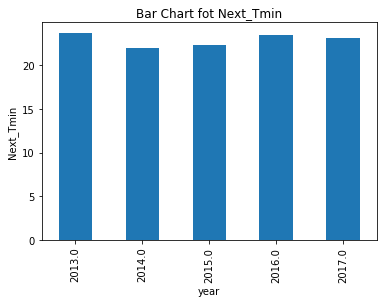

In [67]:
# Bar Chart
df_year.iloc[:,1].plot(kind="bar")
plt.title("Bar Chart fot Next_Tmin")
plt.ylabel("Next_Tmin")

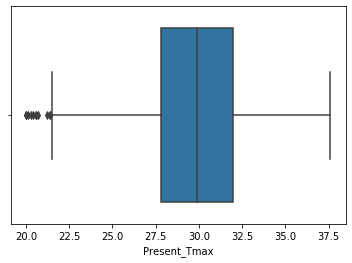

In [68]:
# Ploting BoxPlot of continuous variables
sns.boxplot(df['Present_Tmax'])


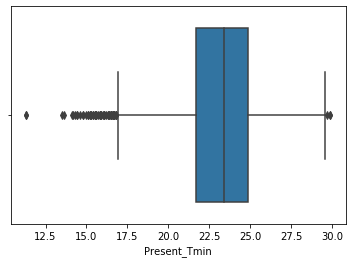

In [69]:
sns.boxplot(df['Present_Tmin'])

In [70]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [71]:
df = df.drop(["Date"],axis=1)

In [72]:
print(df.shape)

(7752, 24)


In [73]:
collist=df.columns.values
ncol=24
nrows=10

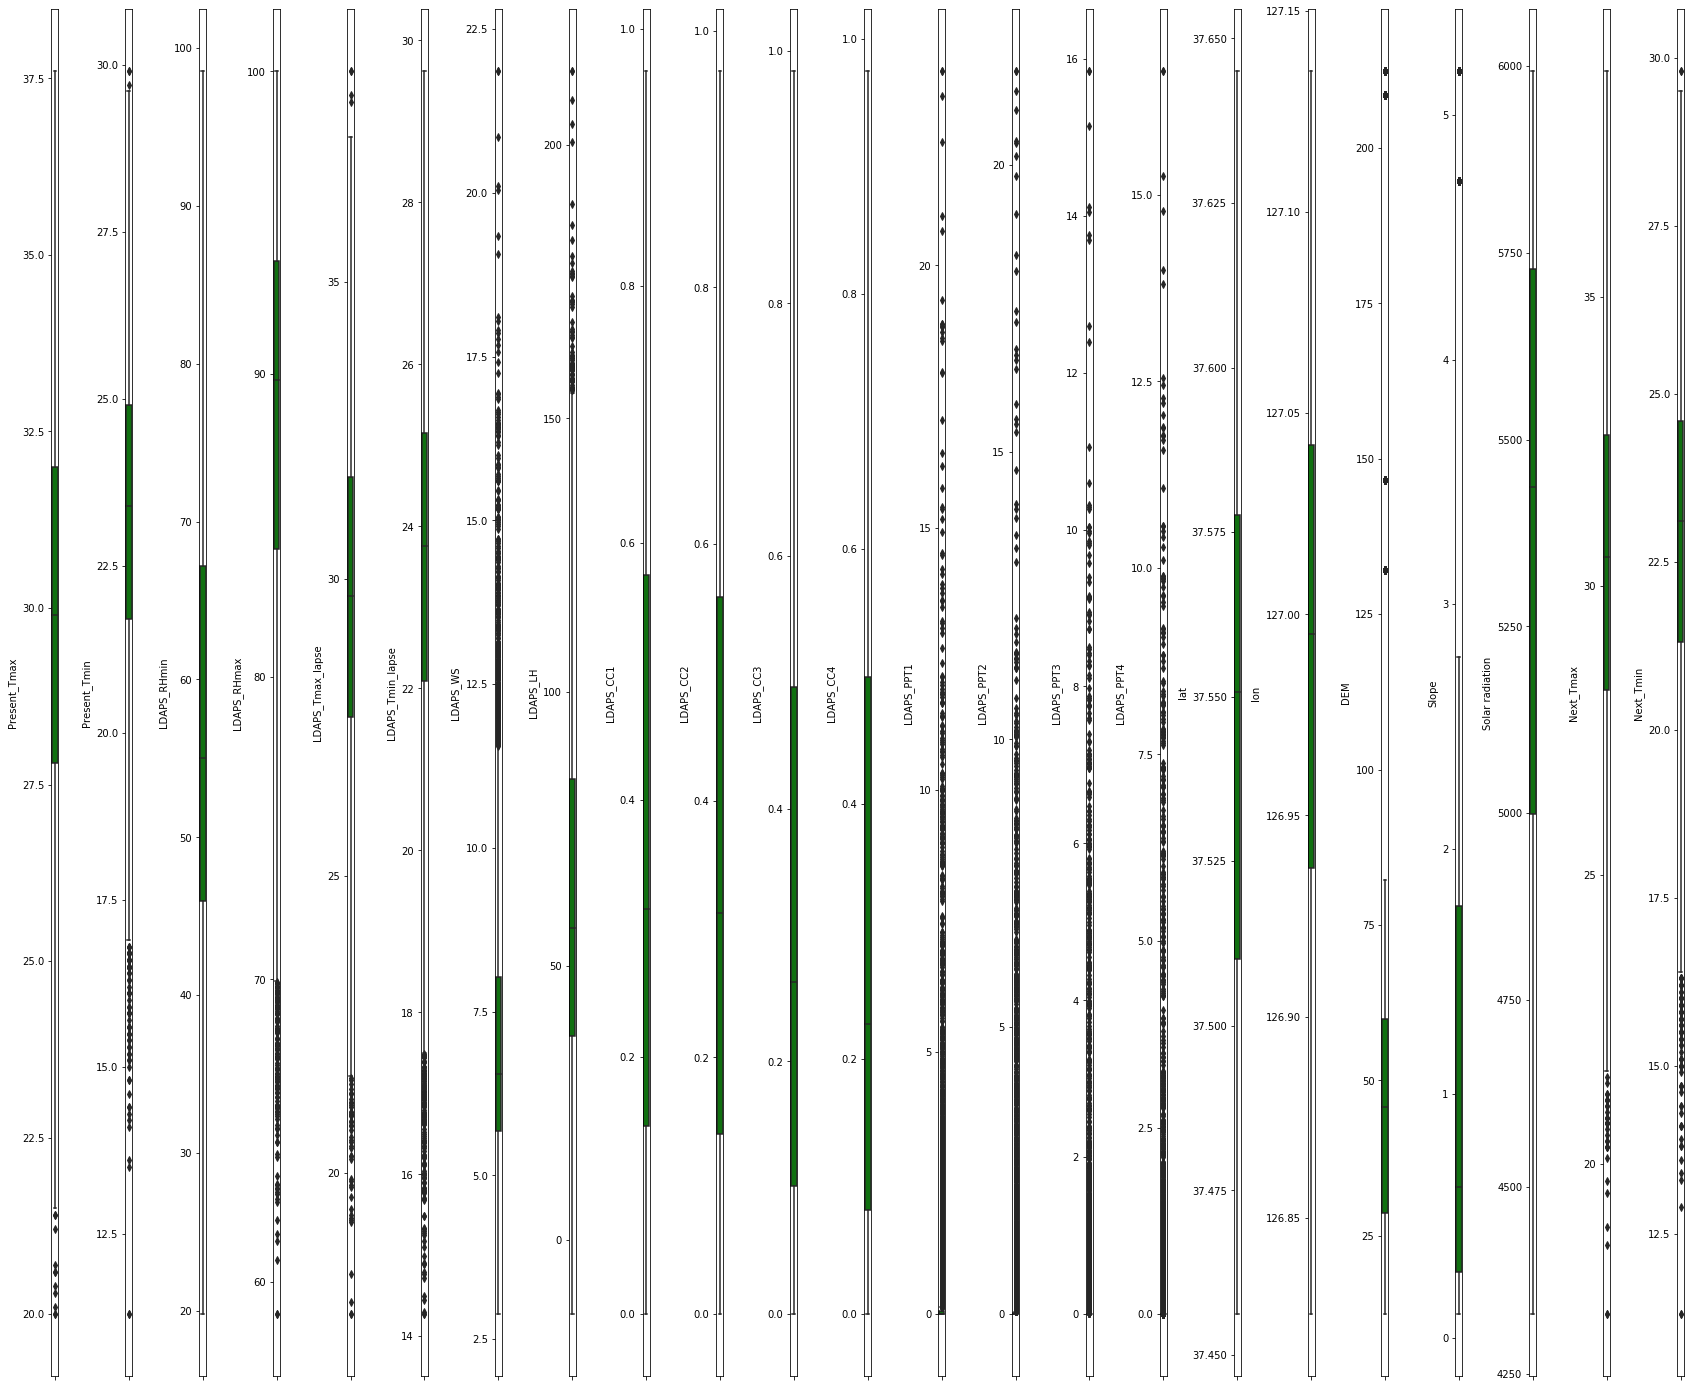

In [74]:
plt.figure(figsize=(ncol,8*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

In [75]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [76]:
cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']
        

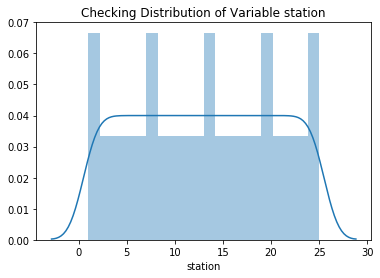

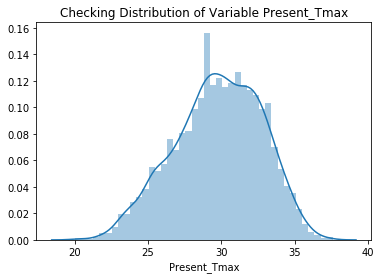

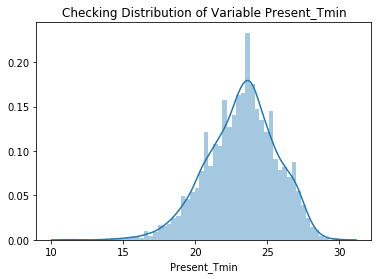

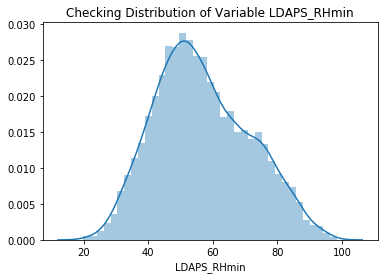

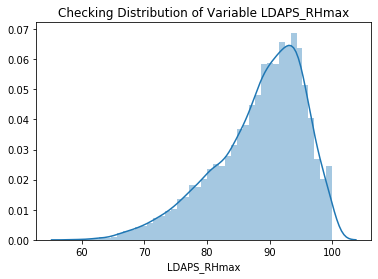

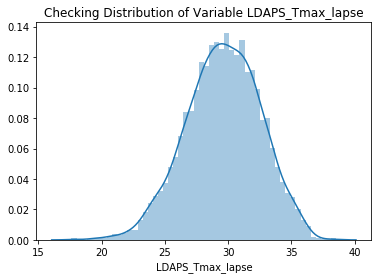

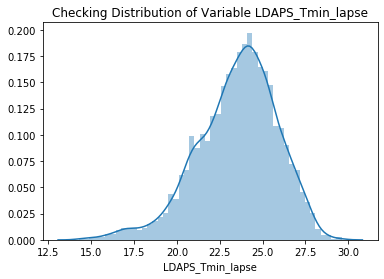

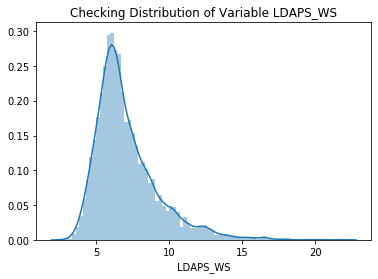

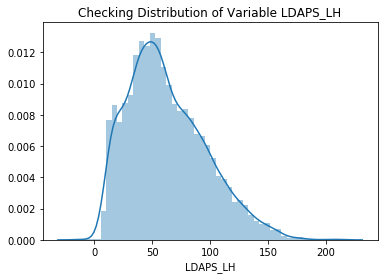

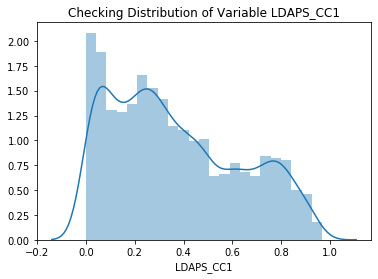

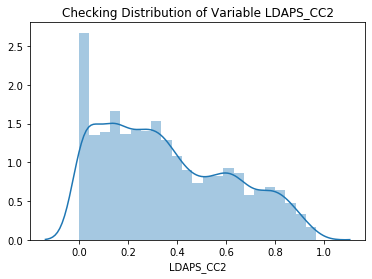

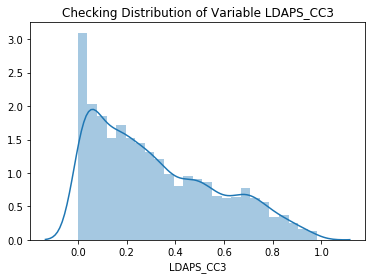

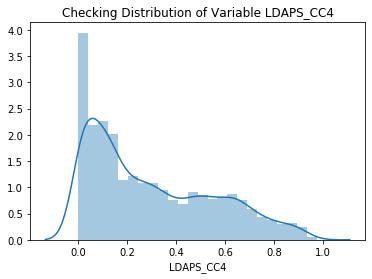

In [77]:
# Checking if there is any normally distributed variable in data

for i in cols:
    sns.distplot(df[i],bins='auto')
    plt.title("Checking Distribution of Variable "+str(i))
    plt.show()

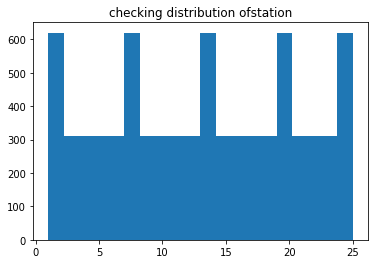

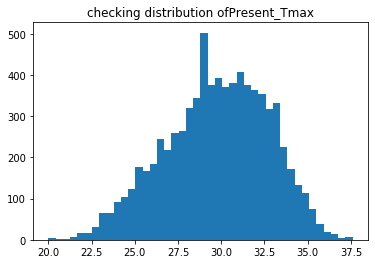

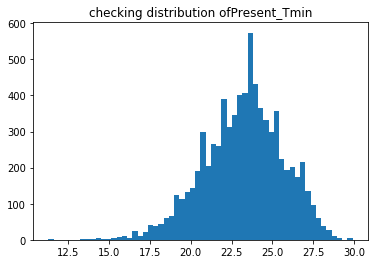

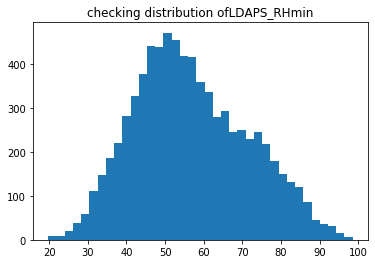

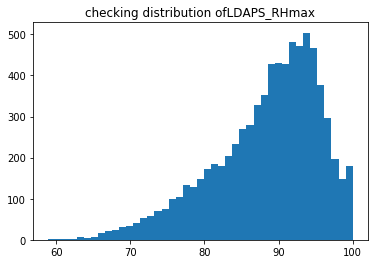

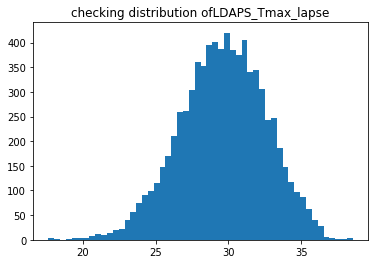

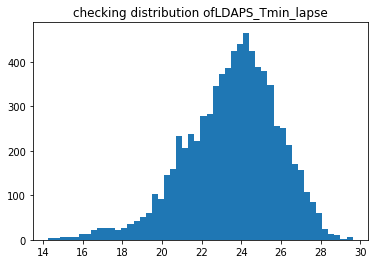

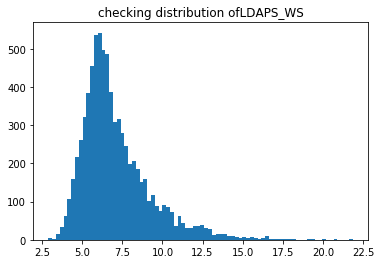

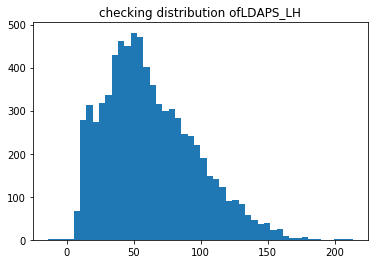

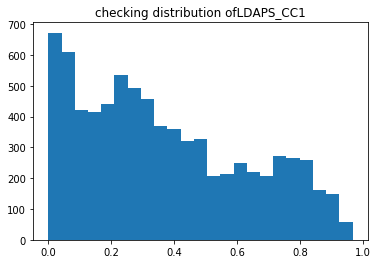

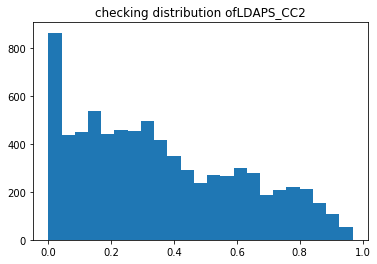

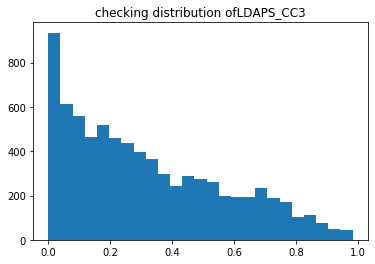

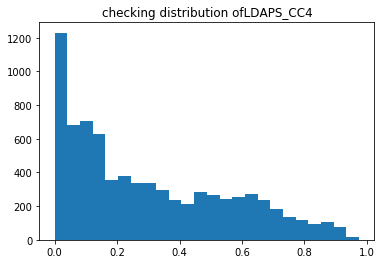

In [78]:
for i in cols:
    plt.hist(df[i],bins='auto')
    plt.title('checking distribution of' + str(i))
    plt.show()

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
# imputing the missing values of numerical data type with the mean value
imp= SimpleImputer(strategy="mean")

for column in df.columns:
    if df[column].dtype == "float64":
        df[column]=imp.fit_transform(df[column].values.reshape(-1,1))

# Removing Outliers

In [81]:
from scipy.stats import zscore
z_score = np.abs(zscore(df))
print(df.shape)
df_new = df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(7752, 24)
(6894, 24)


# Predicting Next_Tmax

In [82]:
x = df_new.drop("Next_Tmax",axis=1)
y = df_new["Next_Tmax"]

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
#scaling the input variables
scale =StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [85]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score

regr = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score) 
    return final_r_state

In [86]:
# Using LinearRegression
lreg = LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.7770771555945511
r2 score corresponding to 43 is 0.7771069675965098
r2 score corresponding to 44 is 0.7725918844689668
r2 score corresponding to 45 is 0.7685893341840166
r2 score corresponding to 46 is 0.7776327450969239
r2 score corresponding to 47 is 0.780766773414024
r2 score corresponding to 48 is 0.7640922743430866
r2 score corresponding to 49 is 0.7810891904491326
r2 score corresponding to 50 is 0.7645380103715762
r2 score corresponding to 51 is 0.7793600515989343
r2 score corresponding to 52 is 0.7709033877947739
r2 score corresponding to 53 is 0.7819521571190735
r2 score corresponding to 54 is 0.7696167100189989
r2 score corresponding to 55 is 0.7555775933177098
r2 score corresponding to 56 is 0.7836411773411973
r2 score corresponding to 57 is 0.7664739308369162
r2 score corresponding to 58 is 0.7822729675972795
r2 score corresponding to 59 is 0.774483933901473
r2 score corresponding to 60 is 0.7614631541233099
r2 score corresponding to 61 is 0

In [87]:
## Using GridSearchCV to find out the best parameters of the KNeighborsRegressor model
neighbors = {"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 26}

In [88]:
# Using the best parameter obtained above finding out the best random sate of KNeighborsRegressor having highest r2 score
knr=KNeighborsRegressor(n_neighbors=26)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7955344827096741
r2 score corresponding to 43 is 0.7868000334069988
r2 score corresponding to 44 is 0.7899599104360698
r2 score corresponding to 45 is 0.7894640715204532
r2 score corresponding to 46 is 0.789899861281376
r2 score corresponding to 47 is 0.8076309967364128
r2 score corresponding to 48 is 0.7923082734863636
r2 score corresponding to 49 is 0.7948185303554901
r2 score corresponding to 50 is 0.7835254799278341
r2 score corresponding to 51 is 0.8005194495090957
r2 score corresponding to 52 is 0.7751400559593062
r2 score corresponding to 53 is 0.7867291069607916
r2 score corresponding to 54 is 0.7840632733548691
r2 score corresponding to 55 is 0.7972984005243297
r2 score corresponding to 56 is 0.7959934949529059
r2 score corresponding to 57 is 0.7870709518151936
r2 score corresponding to 58 is 0.7952826974538086
r2 score corresponding to 59 is 0.7950858452220486
r2 score corresponding to 60 is 0.7862503415919675
r2 score corresponding to 61 is 

In [89]:
# Lets chaeck the mean r2 score of both Linear regression model and knn  regression
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression:  0.7024390613262995
standard deviation in r2 score for Linear Regression:  0.021138506435809168

Mean r2 score for KNN Regression:  0.6050074426714673
standard deviation in r2 score for KNN Regression:  0.06828580336265325


In [90]:
## Using GridSearchCV to find out the best parameters of the Support vector regressor model
parameters={"kernel":["linear","rbf","poly"],"C":[1,10]}
svr = SVR()
clf=GridSearchCV(svr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [91]:
# Using the best parameter obtained above finding out the best random sate of Support vector regressor having highest r2 score
svr= SVR(kernel="linear",C=1)
r_state=maxr2_score(svr,x,y)

r2 score corresponding to 42 is 0.7769154960749214
r2 score corresponding to 43 is 0.7743782585197999
r2 score corresponding to 44 is 0.7710798112162761
r2 score corresponding to 45 is 0.7658131373853806
r2 score corresponding to 46 is 0.7775554514385374
r2 score corresponding to 47 is 0.78023364340346
r2 score corresponding to 48 is 0.7603333627450519
r2 score corresponding to 49 is 0.7743148844508287
r2 score corresponding to 50 is 0.7614842426336386
r2 score corresponding to 51 is 0.7768117499136011
r2 score corresponding to 52 is 0.7650166965036911
r2 score corresponding to 53 is 0.780661888216273
r2 score corresponding to 54 is 0.7628660078648061
r2 score corresponding to 55 is 0.751269432155716
r2 score corresponding to 56 is 0.778908012603349
r2 score corresponding to 57 is 0.7630623126144156
r2 score corresponding to 58 is 0.7785597401871407
r2 score corresponding to 59 is 0.7684388160629199
r2 score corresponding to 60 is 0.7554713312142003
r2 score corresponding to 61 is 0.78

In [92]:
print("Mean r2 score for Support Vector Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Support Vector Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Support Vector Regression:  0.7078282291686255
standard deviation in r2 score for Support Vector Regression:  0.017977021303002064


In [93]:
#Lets check Lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [94]:
#Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.7765837466928391
r2 score corresponding to 43 is 0.7765766976148116
r2 score corresponding to 44 is 0.7704313058256338
r2 score corresponding to 45 is 0.7664191704287602
r2 score corresponding to 46 is 0.7762924483401437
r2 score corresponding to 47 is 0.7808291921893478
r2 score corresponding to 48 is 0.763547057750401
r2 score corresponding to 49 is 0.7801638100408899
r2 score corresponding to 50 is 0.7647981575763714
r2 score corresponding to 51 is 0.7785849435794325
r2 score corresponding to 52 is 0.7691170933506115
r2 score corresponding to 53 is 0.7787568663201183
r2 score corresponding to 54 is 0.7695411564394453
r2 score corresponding to 55 is 0.7558499036463437
r2 score corresponding to 56 is 0.7818714158550171
r2 score corresponding to 57 is 0.7656883396982135
r2 score corresponding to 58 is 0.780756693354122
r2 score corresponding to 59 is 0.7734138036822666
r2 score corresponding to 60 is 0.7594306172204043
r2 score corresponding to 61 is 0

In [95]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.7063070602281849
standard deviation in r2 score for Lasso Regression:  0.022147163317132096


In [96]:
#Lets check Ridge regression and find best value of alpha
rdreg =Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [97]:
#Lets check max r2 score when we use Ridge with best paramtere value =1 obtained using GridSearchCV
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.7770836562300198
r2 score corresponding to 43 is 0.7771102172352853
r2 score corresponding to 44 is 0.7725848119871528
r2 score corresponding to 45 is 0.7685746039034137
r2 score corresponding to 46 is 0.7776138608365949
r2 score corresponding to 47 is 0.7807848499734811
r2 score corresponding to 48 is 0.764089195507569
r2 score corresponding to 49 is 0.781094131304491
r2 score corresponding to 50 is 0.7645348658512077
r2 score corresponding to 51 is 0.7793444623080296
r2 score corresponding to 52 is 0.7708912434270169
r2 score corresponding to 53 is 0.7819244656293423
r2 score corresponding to 54 is 0.7696200033295489
r2 score corresponding to 55 is 0.7555939378807586
r2 score corresponding to 56 is 0.7836320768166631
r2 score corresponding to 57 is 0.7664721558440738
r2 score corresponding to 58 is 0.7822622428257158
r2 score corresponding to 59 is 0.7744838810579895
r2 score corresponding to 60 is 0.7614536512305173
r2 score corresponding to 61 is 0

In [98]:
print("Mean r2 score for Ridge Regression: ",cross_val_score(rdreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Ridge Regression: ",cross_val_score(rdreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge Regression:  0.7024720965010289
standard deviation in r2 score for Ridge Regression:  0.02116688330079199


In [99]:
# Now we will try to use gradinet boosting technique
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [100]:
# Now lets use the cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression:  0.6972403983449187
standard deviation in r2 score for gradient boosting Regression:  0.042690153155284856


In [101]:
# to check whether our result gets boosted or not
from sklearn.ensemble import RandomForestRegressor

In [102]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1200, num =12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [103]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [104]:
rf =RandomForestRegressor()

In [105]:
rf_best_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='r2')

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)
rf_best_tree.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [107]:
y_pred=rf_best_tree.predict(x_test)

In [108]:
rfscore=rf_best_tree.score(x_train,y_train)
print(rfscore*100)

97.47294903413184


In [109]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 0.942891041096089
r2_score is: 0.8983725028424339


*RandomForestRegressor has outperformed LinearRegression ,KNeighborsRegressor,SVR,Lasso,Ridge
 with r2_score of 89.52 appx.

In [111]:
from sklearn.externals import joblib

In [112]:
#Save the model as a pickle in a file
joblib.dump(rf_best_tree,"rfweather.pkl")

['rfweather.pkl']

In [113]:
model=joblib.load("rfweather.pkl")

In [114]:
model.predict(x_test)

array([29.39503864, 27.24224588, 32.18421741, ..., 26.86991132,
       29.0371085 , 33.06613982])

In [115]:
print(y_test)

1347    29.8
6895    26.6
1806    31.8
3111    28.7
7307    25.5
        ... 
3605    29.6
4279    32.6
6136    25.1
3476    28.6
1133    32.7
Name: Next_Tmax, Length: 1379, dtype: float64


# Predicting Next_Tmin

In [116]:
x = df_new.drop("Next_Tmin",axis=1)
y = df_new["Next_Tmin"]

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
#scaling the input variables
scale =StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [119]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score

regr = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score) 
    return final_r_state

In [120]:
# Using LinearRegression
lreg = LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.8333922204753412
r2 score corresponding to 43 is 0.8266498910565326
r2 score corresponding to 44 is 0.8317790863442069
r2 score corresponding to 45 is 0.8388567146159351
r2 score corresponding to 46 is 0.8325206559108648
r2 score corresponding to 47 is 0.8310322419070209
r2 score corresponding to 48 is 0.8375295358537936
r2 score corresponding to 49 is 0.8346850185807825
r2 score corresponding to 50 is 0.8216855571140692
r2 score corresponding to 51 is 0.8406350782703915
r2 score corresponding to 52 is 0.8382334768605428
r2 score corresponding to 53 is 0.8439650587263823
r2 score corresponding to 54 is 0.8261025644463784
r2 score corresponding to 55 is 0.8274631682950675
r2 score corresponding to 56 is 0.8417843221941155
r2 score corresponding to 57 is 0.8285264912267696
r2 score corresponding to 58 is 0.8251588632605575
r2 score corresponding to 59 is 0.8435207640843593
r2 score corresponding to 60 is 0.8338925260075977
r2 score corresponding to 61 is

In [121]:
## Using GridSearchCV to find out the best parameters of the KNeighborsRegressor model
neighbors = {"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 21}

In [122]:
# Using the best parameter obtained above finding out the best random sate of KNeighborsRegressor having highest r2 score
knr=KNeighborsRegressor(n_neighbors=21)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.8417516627771443
r2 score corresponding to 43 is 0.827758364387566
r2 score corresponding to 44 is 0.8373000949174998
r2 score corresponding to 45 is 0.8333172873358612
r2 score corresponding to 46 is 0.8423442534292396
r2 score corresponding to 47 is 0.8417450044801397
r2 score corresponding to 48 is 0.836542761346438
r2 score corresponding to 49 is 0.8507163287529025
r2 score corresponding to 50 is 0.8333924139286244
r2 score corresponding to 51 is 0.8423341871119168
r2 score corresponding to 52 is 0.8358098728714081
r2 score corresponding to 53 is 0.8445305246159334
r2 score corresponding to 54 is 0.8303131972836171
r2 score corresponding to 55 is 0.8346402903154314
r2 score corresponding to 56 is 0.8280035590495652
r2 score corresponding to 57 is 0.8374381280782622
r2 score corresponding to 58 is 0.8333579953696669
r2 score corresponding to 59 is 0.8419577590571374
r2 score corresponding to 60 is 0.8376922396558457
r2 score corresponding to 61 is 0

In [123]:
# Lets chaeck the mean r2 score of both Linear regression model and knn  regression
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression:  0.7880253314634204
standard deviation in r2 score for Linear Regression:  0.06825334669781181

Mean r2 score for KNN Regression:  0.6714653002233664
standard deviation in r2 score for KNN Regression:  0.08642764118638936


In [124]:
## Using GridSearchCV to find out the best parameters of the Support vector regressor model
parameters={"kernel":["linear","rbf","poly"],"C":[1,10]}
svr = SVR()
clf=GridSearchCV(svr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [125]:
# Using the best parameter obtained above finding out the best random sate of Support vector regressor having highest r2 score
svr= SVR(kernel="linear",C=1)
r_state=maxr2_score(svr,x,y)

r2 score corresponding to 42 is 0.8325372735281813
r2 score corresponding to 43 is 0.8248093142488608
r2 score corresponding to 44 is 0.8284653475957114
r2 score corresponding to 45 is 0.8380246285427178
r2 score corresponding to 46 is 0.8317143630413696
r2 score corresponding to 47 is 0.8305748483108126
r2 score corresponding to 48 is 0.8371320226479658
r2 score corresponding to 49 is 0.8331895238004624
r2 score corresponding to 50 is 0.8208906089746238
r2 score corresponding to 51 is 0.8410726530276283
r2 score corresponding to 52 is 0.8359124040727295
r2 score corresponding to 53 is 0.8396235693852884
r2 score corresponding to 54 is 0.8250570955231069
r2 score corresponding to 55 is 0.8244711949181387
r2 score corresponding to 56 is 0.8376894979683001
r2 score corresponding to 57 is 0.8247044996029056
r2 score corresponding to 58 is 0.8196580635976023
r2 score corresponding to 59 is 0.8429368553863803
r2 score corresponding to 60 is 0.8320450368297805
r2 score corresponding to 61 is

In [126]:
print("Mean r2 score for Support Vector Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Support Vector Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Support Vector Regression:  0.7789095748932182
standard deviation in r2 score for Support Vector Regression:  0.07332702641950377


In [127]:
#Lets check Lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [128]:
#Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.8354303374648024
r2 score corresponding to 43 is 0.8250544747754033
r2 score corresponding to 44 is 0.8309561680512796
r2 score corresponding to 45 is 0.837953056535355
r2 score corresponding to 46 is 0.8309339402244672
r2 score corresponding to 47 is 0.8308842566786822
r2 score corresponding to 48 is 0.8354601887130634
r2 score corresponding to 49 is 0.8351831773131422
r2 score corresponding to 50 is 0.8203449267611896
r2 score corresponding to 51 is 0.8395500077172424
r2 score corresponding to 52 is 0.8371574888218756
r2 score corresponding to 53 is 0.8435323263114427
r2 score corresponding to 54 is 0.8242336865260381
r2 score corresponding to 55 is 0.8268176603009464
r2 score corresponding to 56 is 0.8405589993573901
r2 score corresponding to 57 is 0.8263479539570666
r2 score corresponding to 58 is 0.8250479427636976
r2 score corresponding to 59 is 0.8440562776786711
r2 score corresponding to 60 is 0.8330520439069002
r2 score corresponding to 61 is 

In [129]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso  Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.7908444090769234
standard deviation in r2 score for Lasso  Regression:  0.06664122487353513


In [130]:
#Lets check max r2 score when we use Ridge with best paramtere value =1 obtained using GridSearchCV
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.8334032882608463
r2 score corresponding to 43 is 0.8266503266491645
r2 score corresponding to 44 is 0.831780930609358
r2 score corresponding to 45 is 0.8388536384764068
r2 score corresponding to 46 is 0.8325159288712893
r2 score corresponding to 47 is 0.8310448115141398
r2 score corresponding to 48 is 0.8375284253895263
r2 score corresponding to 49 is 0.8347013144824619
r2 score corresponding to 50 is 0.8216774963161411
r2 score corresponding to 51 is 0.8406301323176455
r2 score corresponding to 52 is 0.8382334771036751
r2 score corresponding to 53 is 0.8439650253122608
r2 score corresponding to 54 is 0.82609415689963
r2 score corresponding to 55 is 0.8274613690464895
r2 score corresponding to 56 is 0.841781070046585
r2 score corresponding to 57 is 0.8285221415176729
r2 score corresponding to 58 is 0.8251619556791364
r2 score corresponding to 59 is 0.8435222222372651
r2 score corresponding to 60 is 0.8338914903808883
r2 score corresponding to 61 is 0.8

In [131]:
print("Mean r2 score for Ridge Regression: ",cross_val_score(rdreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Ridge Regression: ",cross_val_score(rdreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge Regression:  0.7880446341402665
standard deviation in r2 score for Ridge Regression:  0.06823716251345562


In [ ]:
# Now we wii try to use gradinet boosting technique
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

In [ ]:
# Now lets use the cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

In [ ]:
# to check whether our result gets boosted or not
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1200, num =12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [ ]:
rf =RandomForestRegressor()

In [ ]:
rf_best_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='r2')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)
rf_best_tree.fit(x_train,y_train)

In [ ]:
y_pred=rf_best_tree.predict(x_test)

In [ ]:
rfscore=rf_best_tree.score(x_train,y_train)
print(rfscore*100)

In [ ]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))